## Case study on Supervised learning
    Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
   species.(also do random forest algorithm)

## 1.Read the dataset to the python environment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel("iris.xls")
dataset.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.shape

(150, 5)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#check for null values
dataset.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
#to display stats about data
dataset.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#to display the no.of samples on each species
dataset["Classification"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Classification, dtype: int64

## Insights
1. The dataset contains the 5 columns(features of different iris flowers) such as sepal length, sepal width ,petal length,      petal width and classification.
2. The dataset contains 150 entries of 3 species types with 50 samples for each.
3. Null values are present in the datset.
4. The datatype of 4 features are float64 and the datatype of classification is object.

## 2.Do necessary pre-processing steps.

### 2.1 Check and handle missing values in the dataset.

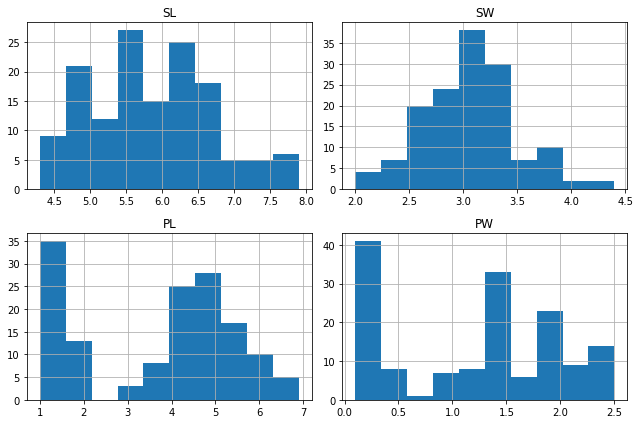

In [8]:
freqgraph=dataset.select_dtypes(include=['float64'])
freqgraph.hist(figsize=(9,6))
plt.tight_layout()
plt.show()

In [9]:
## Filling missing values of Sepal Length with most commonly occuring value.
dataset['SL']=dataset['SL'].fillna(dataset['SL'].value_counts().index[0])

In [10]:
## filing the missing values of Sepal Width with its mean
dataset['SW']=dataset['SW'].fillna(dataset['SW'].mean())

In [11]:
## filing the missing values of Petal Length with its median
dataset['PL']=dataset['PL'].fillna(dataset['PL'].median())

In [12]:
dataset.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [13]:
dataset.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.816000,3.049306,3.780000,1.198667
std,0.828525,0.421884,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2.2 Check the outliers and handle outliers

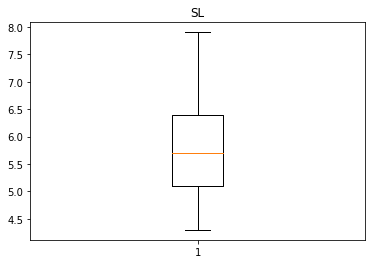

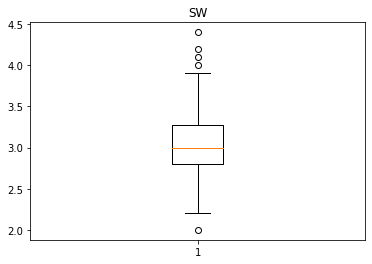

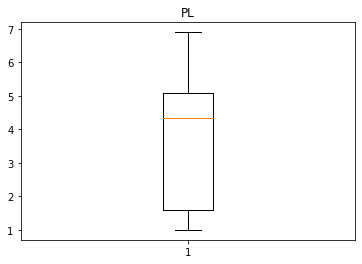

In [14]:
## checking outliers
for i in ['SL','SW', 'PL']:
    plt.title(i)
    plt.boxplot(dataset[i])
    plt.show()  

#### Outliers present in Sepal Width column

In [15]:
## handling outliers in Sepal Width column
q1=np.percentile(dataset['SW'],25,interpolation='midpoint')
q2=np.percentile(dataset['SW'],50,interpolation='midpoint')
q3=np.percentile(dataset['SW'],75,interpolation='midpoint')

In [16]:
IQR=q3-q1
low_limit=q1-IQR*1.5
high_limit=q3+IQR*1.5

In [17]:
## finding the index of those outliers
index=dataset['SW'][(dataset['SW']<low_limit) | (dataset['SW']>high_limit)].index
index

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [18]:
## dropping that index
dataset.drop(index,inplace=True)

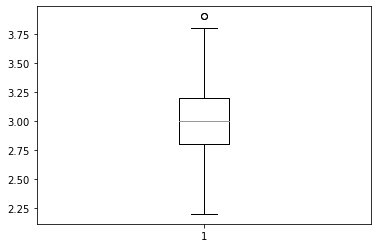

In [19]:
plt.boxplot(dataset['SW'])
plt.show() 

### 2.3 Check the Classification  column and do Dummy encoding.

In [20]:
## one hot encoding
dataset1 = pd.get_dummies(dataset)

In [21]:
dataset1

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.40,0.2,1,0,0
1,4.9,3.0,1.40,0.2,1,0,0
2,5.0,3.2,1.30,0.2,1,0,0
3,4.6,3.1,1.50,0.2,1,0,0
4,5.0,3.6,1.40,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,0,0,1
146,6.3,2.5,5.00,1.9,0,0,1
147,6.5,3.0,4.35,2.0,0,0,1
148,6.2,3.4,5.40,2.3,0,0,1


## 3.Find out which classification model gives the best result to predict iris species.(also do                    random forest algorithm)

In [22]:
#to find the correlation coefficient between the variables.
dataset.corr()

,SL,SW,PL,PW
SL,1.000000,-0.125337,0.837766,0.794855
SW,-0.125337,1.000000,-0.365238,-0.296118
PL,0.837766,-0.365238,1.000000,0.933262
PW,0.794855,-0.296118,0.933262,1.000000


<AxesSubplot:>

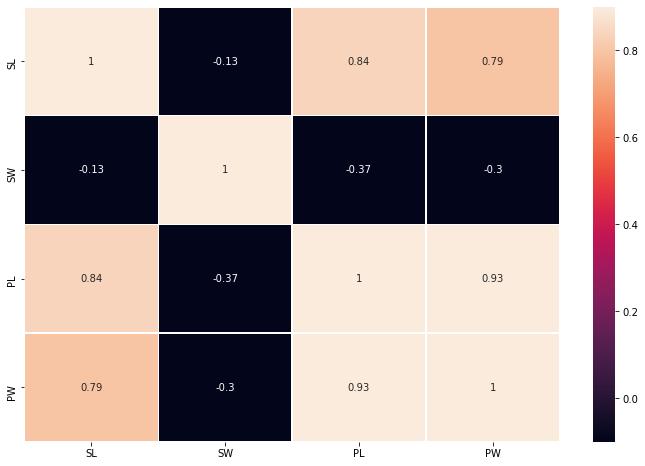

In [23]:
corr=dataset.corr()
fig,ax=plt.subplots(figsize=(12,8))
sns.heatmap(corr,annot=True,vmin=-0.1,vmax=0.9,linewidth=0.2)

In [24]:
#converting "Classification" column to machine-readable form using Label Encoder.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
dataset['Classification']=le.fit_transform(dataset['Classification'])
dataset.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.0,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
dataset.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [27]:
#split the dataset
Y=dataset['Classification']
X=dataset.drop('Classification',axis=1)

In [28]:
#split into testing and training set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=46,test_size=0.30)

In [29]:
X_train.shape

(101, 4)

In [30]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [31]:
model.fit(X_train,Y_train)

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
Y_pred=model.predict(X_test)

In [33]:
Y_pred

array([0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2,
       1, 0, 1, 2, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0])

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [35]:
print("Accuracy is:",accuracy_score(Y_test,Y_pred))
print("Precision is:",precision_score(Y_test,Y_pred,average='macro'))
print("Recall is:",recall_score(Y_test,Y_pred,average='macro'))
print("F1 score is:",f1_score(Y_test,Y_pred,average='macro'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 score is: 1.0


In [46]:
confusion_matrix(Y_test,Y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 11]], dtype=int64)

### KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
acc_val =[]
neighbors = np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,Y_train)
    Y_pred = classifier.predict(X_test)
    acc = accuracy_score(Y_test,Y_pred)
    acc_val.append(acc)


In [38]:
acc_val

[0.9772727272727273,
 0.9772727272727273,
 0.9772727272727273,
 0.9772727272727273,
 0.9772727272727273,
 0.9545454545454546,
 1.0,
 0.9545454545454546,
 0.9772727272727273,
 0.9772727272727273,
 1.0,
 1.0]

Text(0, 0.5, 'Accuracy')

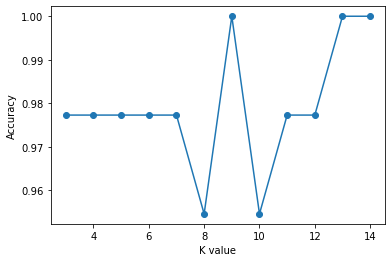

In [41]:
#to find the highest accuracy k value
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')

In [42]:
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)

In [43]:
print("Accuracy is:",accuracy_score(Y_test,Y_pred))
print("Precision is:",precision_score(Y_test,Y_pred,average='macro'))
print("Recall is:",recall_score(Y_test,Y_pred,average='macro'))
print("F1 score is:",f1_score(Y_test,Y_pred,average='macro'))

Accuracy is: 0.9772727272727273
Precision is: 0.9761904761904763
Recall is: 0.9722222222222222
F1 score is: 0.9731615673644659


In [45]:
confusion_matrix(Y_test,Y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 11]], dtype=int64)

In [47]:
dataset.describe()

,SL,SW,PL,PW,Classification
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.828966,3.025489,3.847586,1.226897,1.027586
std,0.837897,0.374355,1.712265,0.758219,0.816027
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.200000,5.100000,1.800000,2.000000
max,7.900000,3.900000,6.900000,2.500000,2.000000


## SVM

In [54]:
df0=dataset[dataset.Classification==0]
df1=dataset[dataset.Classification==1]
df2=dataset[dataset.Classification==2]

Text(0, 0.5, 'Sepal Width')

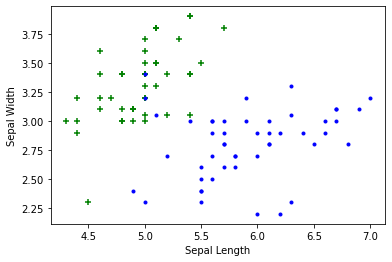

In [55]:
plt.scatter(df0['SL'],df0['SW'],color='green',marker='+')
plt.scatter(df1['SL'],df1['SW'],color='blue',marker='.')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0.5, 0, 'Petal Length')

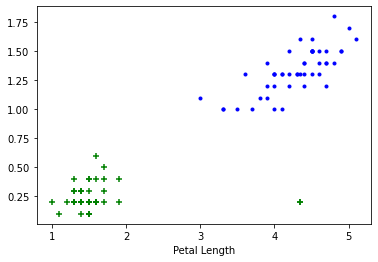

In [56]:
plt.scatter(df0['PL'],df0['PW'],color='green',marker='+')
plt.scatter(df1['PL'],df1['PW'],color='blue',marker='.')
plt.xlabel('Petal Length')
plt.xlabel('Petal Length')

In [57]:
Y=dataset['Classification']
X=dataset.drop('Classification',axis=1)

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=46,test_size=0.30)

In [59]:
len(X_train)

101

In [60]:
len(X_test)

44

In [61]:
from sklearn.svm import SVC

In [62]:
svm_linear=SVC(kernel="linear")
svm_linear.fit(X_train,Y_train)
Y_pred=svm_linear.predict(X_test)
print("Accuracy using linearSVM is:",accuracy_score(Y_test,Y_pred))

Accuracy using linearSVM is: 0.9772727272727273


## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [49]:
model.score(X_test,Y_test)

0.9772727272727273

In [50]:
Y_pred = model.predict(X_test)
Y_pred

array([0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 2, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0])

In [51]:
from sklearn.metrics import f1_score,confusion_matrix
f1_score(Y_test,Y_pred,average='micro')

0.9772727272727273

In [52]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 11]], dtype=int64)

Text(69.0, 0.5, 'Truth')

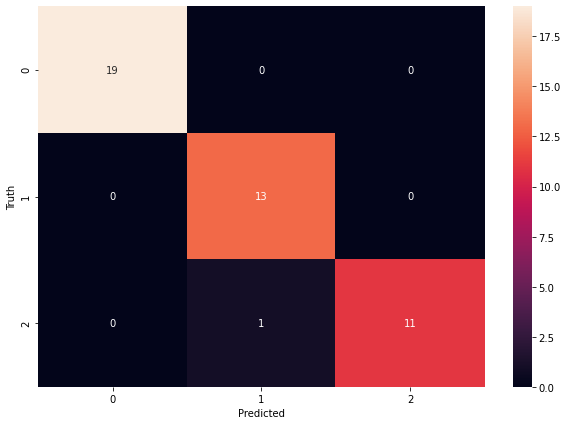

In [53]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')